In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

In [2]:
df = pd.read_csv("YT_ds_channels.csv")
df.head()

,youtuber,id,uploads,subscribers,video views,country,account created,estimated monthly income
0,3Blue1Brown,@3blue1brown,127,4.91M,316927667,US,"Mar 3rd, 2015",$844 - $13.5K
1,Joma Tech,@jomaoppa,107,2.06M,164892515,US,"Aug 31st, 2016",$711 - $11.4K
2,The Coding Train,@thecodingtrain,1210,1.54M,110960063,US,"Jul 3rd, 2006",$229 - $3.7K
3,sentdex,@sentdex,1233,1.2M,107212166,US,"Dec 16th, 2012",$214 - $3.4K
4,Tech With Tim,@techwithtim,772,1.14M,102224704,CA,"Apr 23rd, 2014",$516 - $8.3K


## Data Description


1. youtuber – Name of the YouTube channel
2. id – Channel ID
3. uploads – number of videos uploaded on the channels
4. subscribers – of subscribers of the channel
5. video views – total count of all videos in the channel
6. country - the two-letter country abbreviation
7. account created – date of creation of the channel
8. estimated monthly income - This is the range of estimated monthly income based on CPM, or cost per mille, and shows how much advertisers pay

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   youtuber                  30 non-null     object
 1   id                        30 non-null     object
 2   uploads                   30 non-null     int64 
 3   subscribers               30 non-null     object
 4   video views               30 non-null     int64 
 5   country                   30 non-null     object
 6   account created           30 non-null     object
 7   estimated monthly income  30 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.0+ KB


## Data Cleaning

### Lets start with ***subscribers*** coloum

In [4]:
subs_arr = df["subscribers"]
new_subs = []
for i in range(len(subs_arr)):
    # print(subs_arr[i][-1])
    prefix = subs_arr[i][-1]
    sub_count = subs_arr[i][:-1]
    if prefix == "M":
        new_subs.append(float(sub_count) * 1000000)
    if prefix == "K":
        new_subs.append(float(sub_count) * 1000)        

df_copy = df.copy()
df_copy["subscribers"] = new_subs

### Now, lets the ***year*** in the channel was created

In [5]:
yrs_arr = df["account created"]
new_yrs = []
for i in range(len(yrs_arr)):
    new_yrs.append(yrs_arr[i].split(" ", -1)[-1])
    # break

df_copy["year_created"] = new_yrs

### Lets, get some ***min, max, avg. of the monthly income***

In [6]:
import re

income = df["estimated monthly income"]
min_income, max_income, avg_income = [],[],[]
for i in range(len(income)):
    
    min_val = float(re.findall(r'\d+', income[i])[0])
    min_income.append(min_val)
    
    inc1 = income[i].split("- ", 1)[-1]
    inc1 = inc1[1:]
    
    if inc1[-1] == "K":
        max_val = float(inc1[0:-1])*1000
        
    max_income.append(max_val)

    avg_income.append((min_val+max_val)/2)
df_copy["min_income"], df_copy["max_income"], df_copy["avg_income"] = min_income, max_income, avg_income

### Rename and change the data type of the coloumns

In [7]:
df_copy = df_copy.rename(columns={"video views": "total_veiws"})

df_copy['subscribers'] = df_copy['subscribers'].astype(int)
df_copy['min_income'] = df_copy['min_income'].astype(int)
df_copy['max_income'] = df_copy['max_income'].astype(int)
df_copy['avg_income'] = df_copy['avg_income'].astype(int)

### Drop the unnecessary coloumns

In [8]:
df_copy.drop(['account created', 'estimated monthly income'], axis=1, inplace=True)

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   youtuber      30 non-null     object
 1   id            30 non-null     object
 2   uploads       30 non-null     int64 
 3   subscribers   30 non-null     int32 
 4   total_veiws   30 non-null     int64 
 5   country       30 non-null     object
 6   year_created  30 non-null     object
 7   min_income    30 non-null     int32 
 8   max_income    30 non-null     int32 
 9   avg_income    30 non-null     int32 
dtypes: int32(4), int64(2), object(4)
memory usage: 2.0+ KB


In [10]:
df_copy.describe()

,uploads,subscribers,total_veiws,min_income,max_income,avg_income
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000
mean,387.633333,5.923737e+05,4.099272e+07,158.866667,3800.000000,1979.233333
std,403.531094,9.654415e+05,6.722583e+07,212.030696,2816.943807,1505.008436
min,32.000000,6.150000e+03,2.521440e+05,0.000000,1600.000000,850.000000
25%,137.500000,5.717500e+04,2.771000e+06,11.750000,1700.000000,860.250000
50%,226.500000,2.515000e+05,1.110823e+07,77.500000,3500.000000,1858.500000
75%,427.500000,7.210000e+05,4.828713e+07,217.500000,4000.000000,2014.500000
max,1600.000000,4.910000e+06,3.169277e+08,844.000000,13500.000000,7172.000000


## Data Visualization

In [11]:
df_copy.head()

,youtuber,id,uploads,subscribers,total_veiws,country,year_created,min_income,max_income,avg_income
0,3Blue1Brown,@3blue1brown,127,4910000,316927667,US,2015,844,13500,7172
1,Joma Tech,@jomaoppa,107,2060000,164892515,US,2016,711,11400,6055
2,The Coding Train,@thecodingtrain,1210,1540000,110960063,US,2006,229,3700,1964
3,sentdex,@sentdex,1233,1200000,107212166,US,2012,214,3400,1807
4,Tech With Tim,@techwithtim,772,1140000,102224704,CA,2014,516,8300,4408


In [120]:
df_copy["country"].value_counts()

US    20
IN     5
CA     1
BG     1
TH     1
AT     1
DE     1
Name: country, dtype: int64

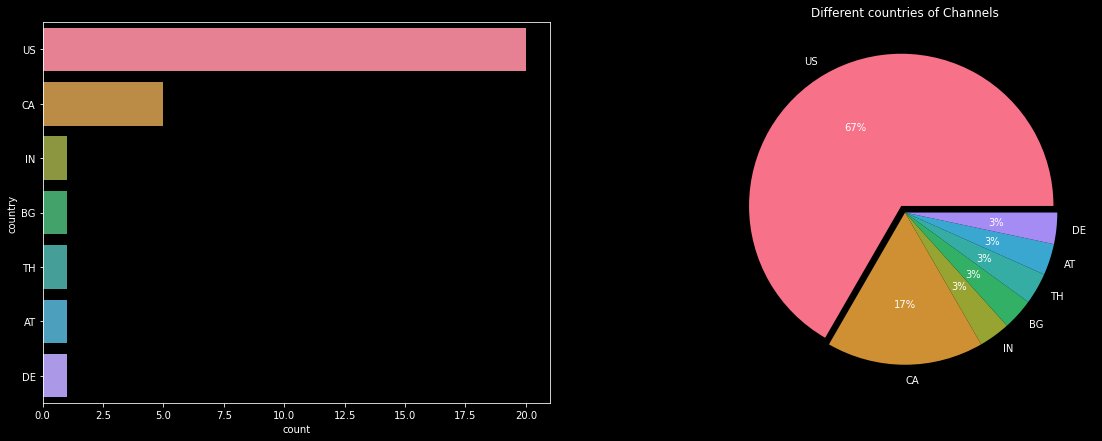

In [13]:
plt.figure(figsize=(20, 7))
countries = df_copy["country"].value_counts()

palette = sns.color_palette("husl", 8)

plt.subplot(1, 2, 1)
sns.barplot(data=df_copy, x=countries, y=df_copy["country"].unique(), palette=palette)
plt.xlabel('count')
plt.ylabel('country')

`
plt.subplot(1, 2, 2)

plt.pie(data=df_copy, x=countries, labels=df_copy["country"].unique(), autopct='%.0f%%', colors=palette, explode = [0.05,0,0,0,0,0,0])
plt.title("Different countries of Channels")



plt.show()

In [14]:
df_copy.corr().style.background_gradient(cmap=plt.cm.cubehelix)

,uploads,subscribers,total_veiws,min_income,max_income,avg_income
uploads,1.000000,0.111308,0.204040,0.168940,0.098963,0.104524
subscribers,0.111308,1.000000,0.986875,0.880599,0.835221,0.843696
total_veiws,0.204040,0.986875,1.000000,0.907201,0.852246,0.861504
min_income,0.168940,0.880599,0.907201,1.000000,0.904083,0.916558
max_income,0.098963,0.835221,0.852246,0.904083,1.000000,0.999545
avg_income,0.104524,0.843696,0.861504,0.916558,0.999545,1.000000


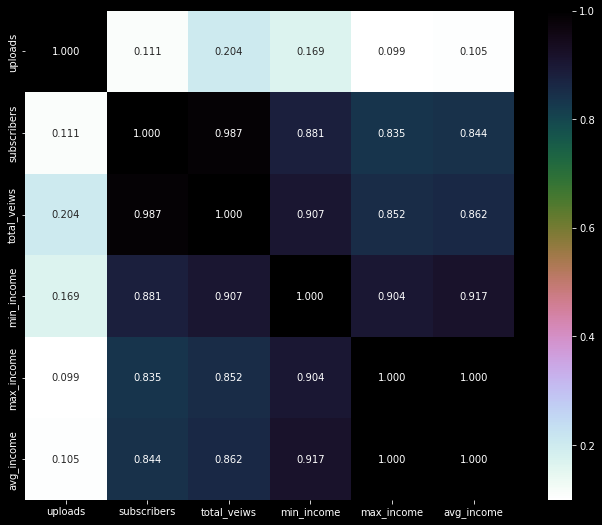

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(df_copy.corr(), annot = True, cmap=plt.cm.cubehelix_r, fmt='.3f', square=True)
plt.show()

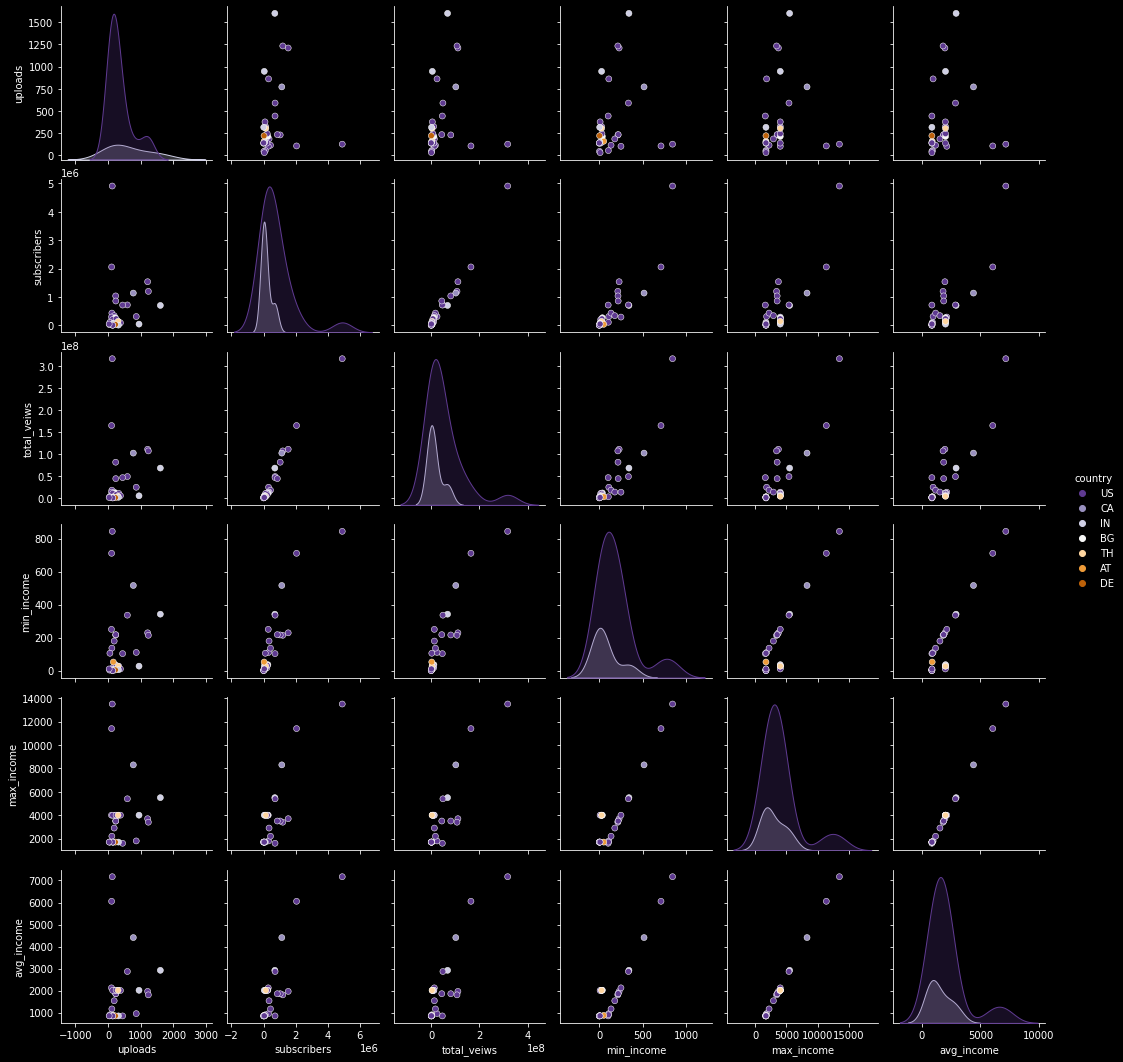

In [16]:
sns.pairplot(df_copy, hue='country', palette="PuOr_r")
plt.show()

## Model

In [17]:
X, y = df_copy['total_veiws'].values, df_copy['avg_income'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [19]:
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()

In [20]:
X_train, y_train = X_train.reshape(-1, 1), y_train
X_test, y_test = X_test.reshape(-1, 1), y_test

In [21]:
LReg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_test

array([ 850, 2008,  851, 2015,  851, 1859])

In [24]:
LReg.score(X_test, y_test)

-0.4692154073878463

In [25]:
LReg.predict(X_test)

array([1227.36036344, 1424.8737891 , 1263.39072937, 1361.54657153,
       2120.46827314, 2076.00731753])

In [26]:
y_test

array([ 850, 2008,  851, 2015,  851, 1859])

In [27]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [28]:
lasso_reg.score(X_test, y_test)

-0.46921540728219524